<a href="https://colab.research.google.com/github/2310030224-PranayVarma/codex_intern_cxiai202511017/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a house price prediction analysis using a Linear Regression model. This involves loading a housing dataset, exploring its feature distributions, handling missing data, preprocessing features, splitting the data into training and testing sets, training the model, evaluating its performance using metrics such as Mean Squared Error, visualizing predicted versus actual values, and finally summarizing the model's performance and key insights gained.

## Load Dataset and Explore Distributions

### Subtask:
Load the housing dataset and explore the distributions of its features. This may involve visualizing key variables to understand their spread and identify potential outliers.


Downloaded housing dataset to /content/housing.csv
First 5 rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR

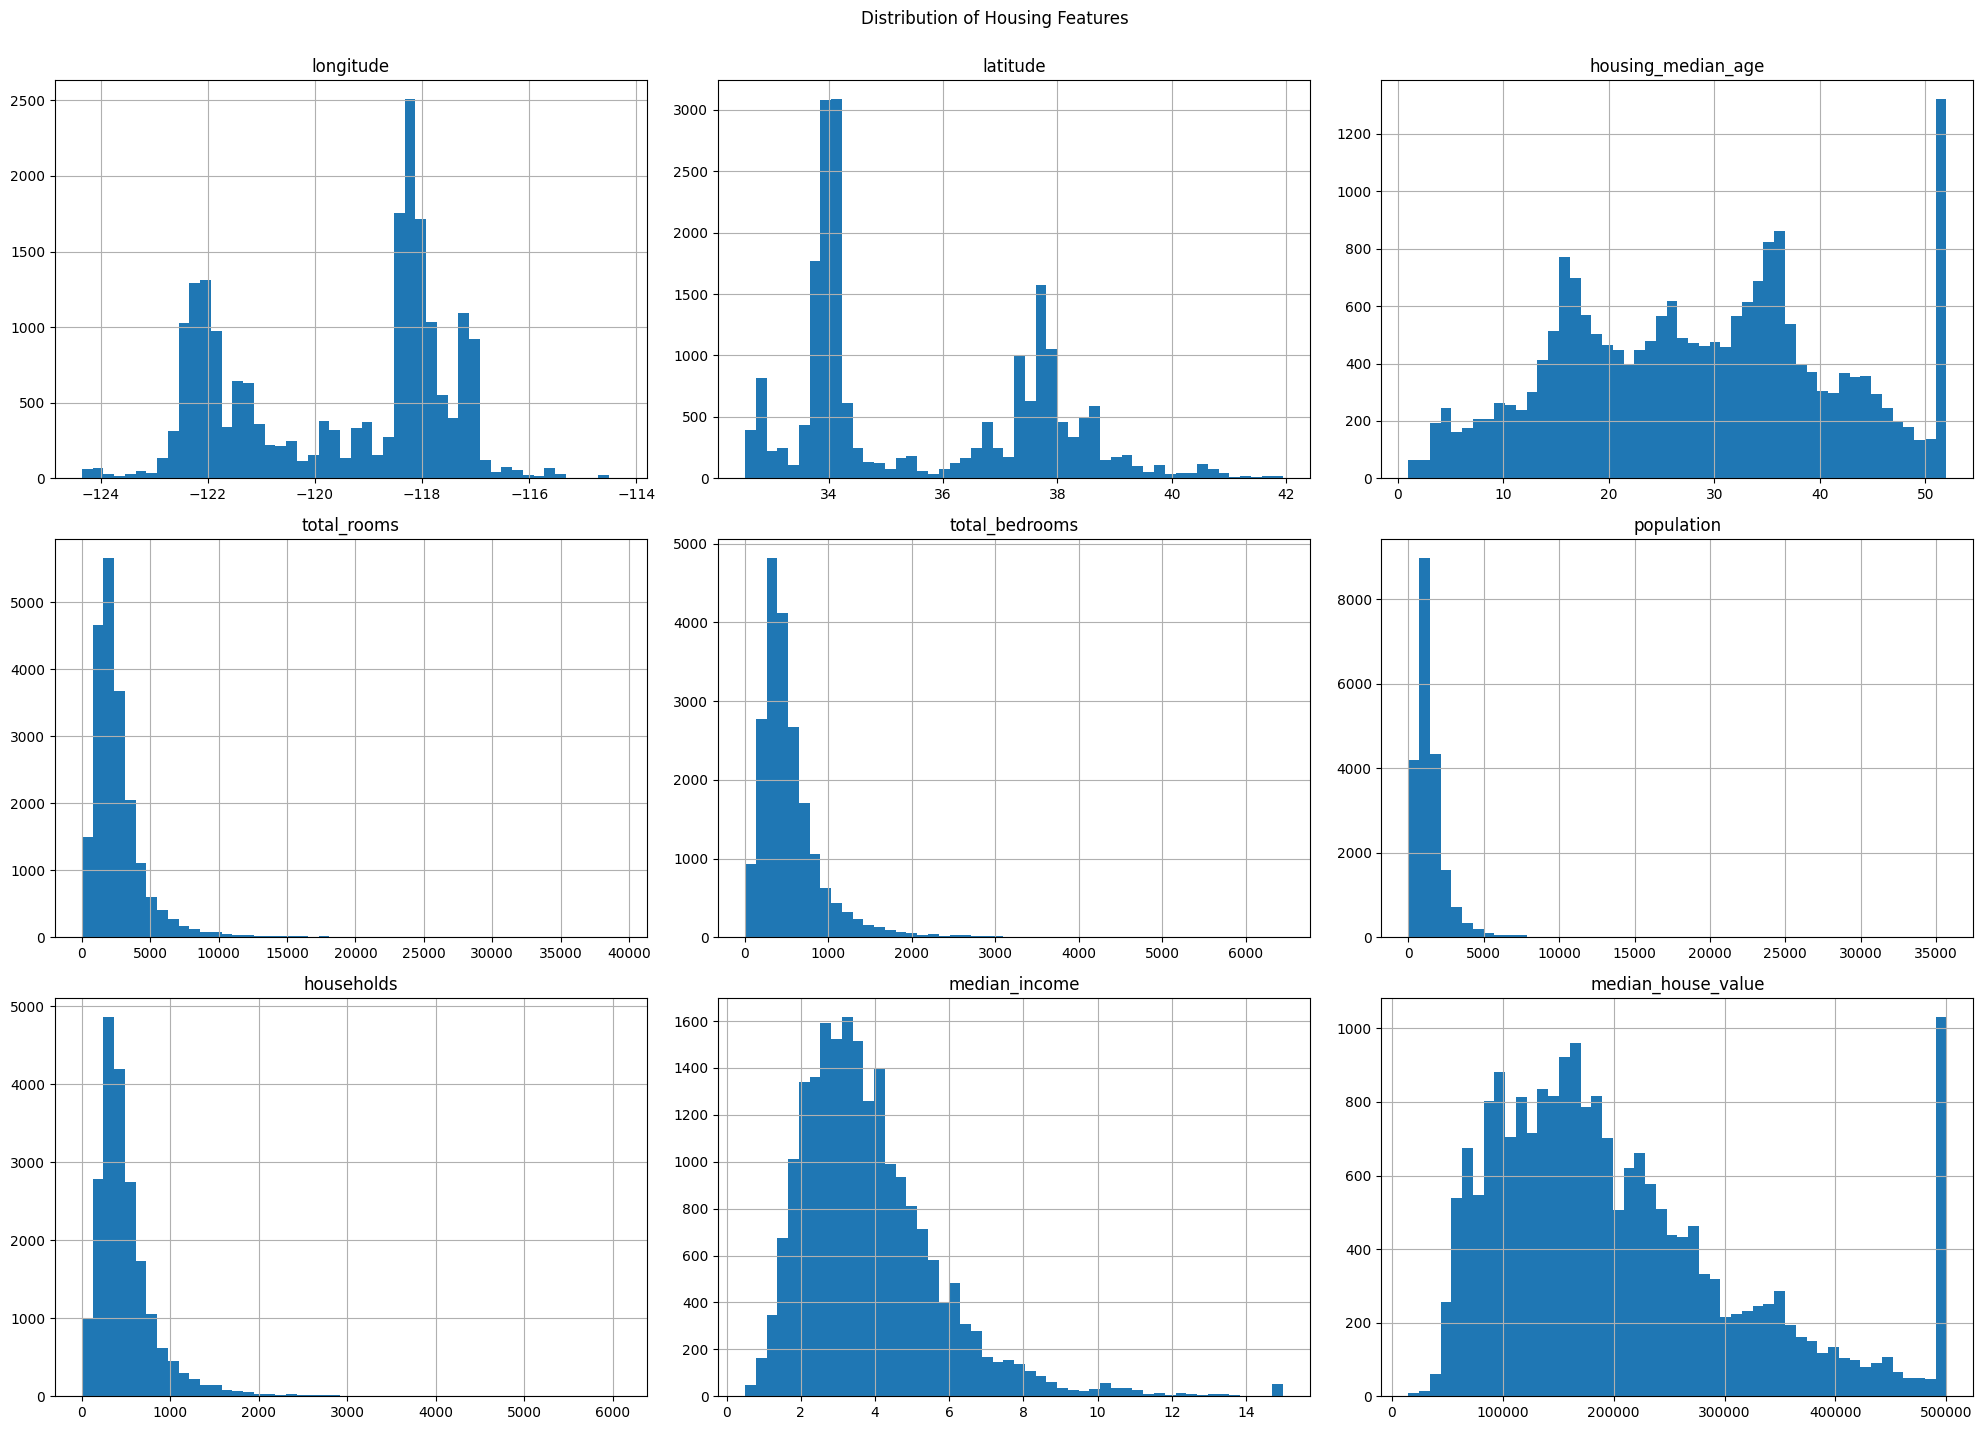

In [23]:
import pandas as pd
import os

# Define the URL for a housing dataset
housing_dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
new_file_path = "/content/housing.csv"

# Download the housing dataset
if not os.path.exists(new_file_path):
    !wget -q $housing_dataset_url -O $new_file_path
    print(f"Downloaded housing dataset to {new_file_path}")
else:
    print(f"Housing dataset already exists at {new_file_path}")

# Load the housing dataset
df = pd.read_csv(new_file_path)

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

# Generate histograms for numerical features
import matplotlib.pyplot as plt

df.hist(figsize=(20, 15), bins=50)
plt.suptitle("Distribution of Housing Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

## Handle Missing Data and Preprocess Inputs

### Subtask:
Identify and handle any missing data in the dataset. Apply necessary preprocessing steps, including normalization of numerical features, to prepare the data for model training.


**Reasoning**:
First, I'll print the sum of null values for each column to identify where missing data exists. Then, I'll fill the missing values in the 'total_bedrooms' column using its median, as this is a robust method for handling numerical missing data, followed by confirming that all null values have been handled.



In [24]:
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values in 'total_bedrooms' with the median
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing values after handling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/tmp/ipython-input-2642171335.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


**Reasoning**:
The previous step successfully handled missing values but issued a `FutureWarning` due to `inplace=True`. I will now explicitly reassign the column to avoid this warning. Then, I will proceed with separating the target variable, identifying numerical and categorical features, applying one-hot encoding to the categorical features, scaling the numerical features using `StandardScaler`, and finally concatenating them to create the `X_processed` dataset as per the instructions.



In [25]:
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values in 'total_bedrooms' with the median
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_total_bedrooms)

print("\nMissing values after handling:")
print(df.isnull().sum())

# Separate target variable (y) and features (X)
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print(f"\nNumerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

# Apply one-hot encoding to categorical features
X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_cols])

# Convert scaled numerical features back to DataFrame with original column names
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_cols, index=X.index)

# Concatenate processed numerical and categorical features
X_processed = pd.concat([X_numerical_scaled, X_categorical], axis=1)

print("\nShape of X_processed:", X_processed.shape)
print("First 5 rows of X_processed:\n", X_processed.head())

Missing values before handling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Missing values after handling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Numerical columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical columns: ['ocean_proximity']

Shape of X_processed: (20640, 12)
First 5 rows of X_processed:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185      

## Split Data into Train and Test Sets

### Subtask:
Divide the preprocessed dataset into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
To divide the preprocessed data into training and testing sets, I will import the `train_test_split` function, apply it to `X_processed` and `y` with the specified parameters, and then display the shapes of the resulting datasets to verify the split.



In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 12)
Shape of X_test: (4128, 12)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


## Train Linear Regression Model

### Subtask:
Train a Linear Regression model using the training data to predict house prices based on the selected features.


**Reasoning**:
To train the Linear Regression model, I will import `LinearRegression`, instantiate it, and then fit the model using the preprocessed training data `X_train` and `y_train`.



In [27]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's predictions on the test set using Mean Squared Error (MSE) and other relevant regression metrics to assess its accuracy. Generate a plot to visualize predicted vs actual values.


**Reasoning**:
I need to make predictions using the trained model, calculate evaluation metrics (MSE, R2, MAE), and then visualize the actual vs. predicted values. I will start by making predictions on the test set.



Mean Squared Error (MSE): 4908476721.16
R-squared (R2) Score: 0.63
Mean Absolute Error (MAE): 50670.74


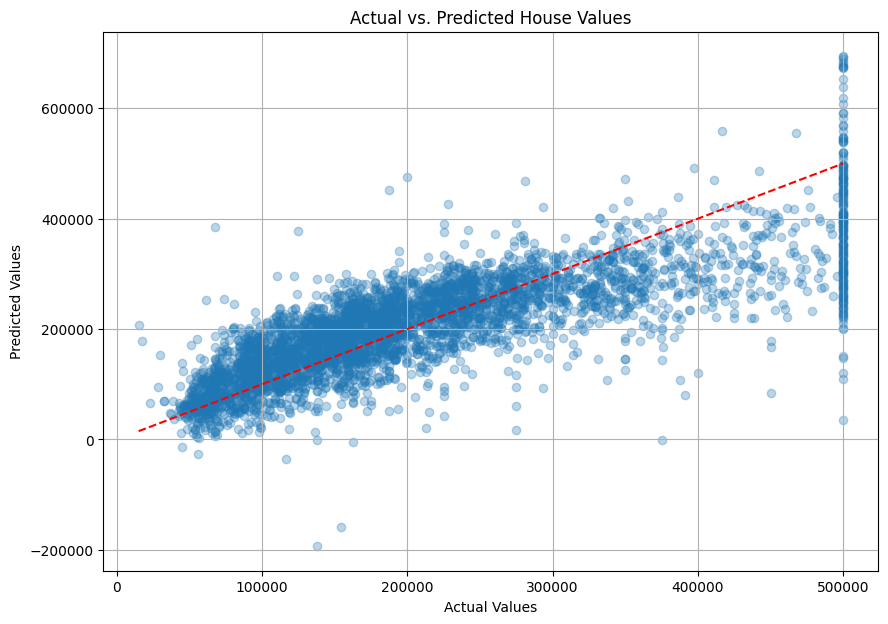

In [28]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.title('Actual vs. Predicted House Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the house price prediction task, including the model's performance and any key insights gained from the analysis.


## Summary:

### Q&A
The Linear Regression model for house price prediction achieved an R-squared (R2) score of 0.63 on the test set, indicating it explains 63% of the variance in house prices. The Mean Squared Error (MSE) was approximately 4,908,476,721.16, and the Mean Absolute Error (MAE) was around \$50,670.74. This suggests that, on average, the model's predictions deviate by about \$50,670.74 from the actual house values.

Key insights gained from the analysis include:
*   The dataset initially contained 207 missing values in the `total_bedrooms` column, which were successfully imputed using the median value.
*   The target variable, `median_house_value`, along with `median_income`, showed signs of capping at the upper end of their distributions, which could influence model performance, particularly for higher-valued properties.
*   Preprocessing steps, including one-hot encoding for the categorical `ocean_proximity` feature and standardization for numerical features, were crucial for preparing the data for the linear model.
*   The visualization of actual versus predicted values revealed a general positive correlation, but also a noticeable spread, especially for higher actual values, suggesting that the model struggles to predict these extreme values accurately.

### Data Analysis Key Findings
*   The dataset contained 20640 entries with 10 features, including `median_house_value` as the target variable.
*   Initial data exploration revealed 207 missing values in the `total_bedrooms` column, which were successfully handled by imputing with the median value of that column.
*   The `ocean_proximity` feature, being categorical, was transformed using one-hot encoding, resulting in multiple binary features.
*   Numerical features were scaled using `StandardScaler`, and the final preprocessed feature set (`X_processed`) comprised 12 features.
*   The data was split into training (16512 samples) and testing (4128 samples) sets, with an 80/20 ratio.
*   A Linear Regression model was trained, achieving a Mean Squared Error (MSE) of 4,908,476,721.16, a Mean Absolute Error (MAE) of \$50,670.74, and an R-squared (R2) score of 0.63 on the test set.

### Insights or Next Steps
*   **Insight**: The Linear Regression model provides a reasonable baseline (R2 = 0.63), but the MAE of over \$50k indicates substantial prediction errors, suggesting that the model might not be sufficiently capturing the complexities of house price determinants.
*   **Next Steps**: Consider exploring more advanced regression models (e.g., Random Forest, Gradient Boosting) or implementing feature engineering techniques (e.g., creating polynomial features, interaction terms) to potentially improve predictive accuracy and reduce errors. Additionally, addressing the capping observed in `median_house_value` and `median_income` might be beneficial.
